# Analisis de datos del proyecto

## Importacion de los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

'''Ruta de el data set'''
file_data_path = './data/mental_health_dataset.csv'

'''Carga de datos del archivo cvs a python con pandas'''
data_health = pd.read_csv(file_data_path,sep=',')

## Analisis de Edades en las que hay peor salud mental Rangos (18-33) - (34-39) - (40- 65)

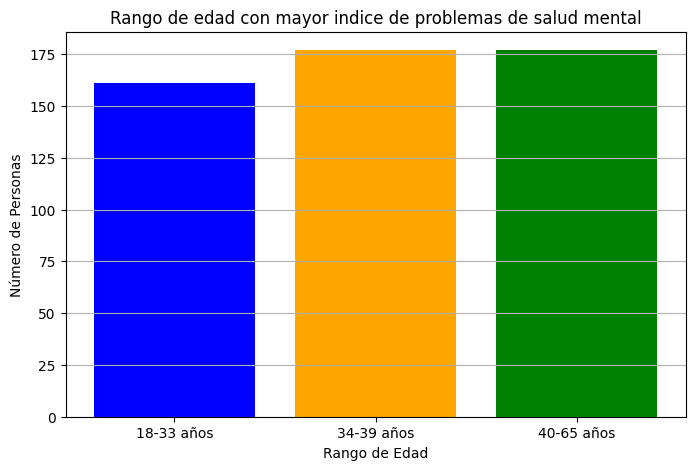

In [3]:
data = data_health

mascara1 = ((data['Age'] >= 18) & (data['Age'] <= 33) & (data['Mental_Health_Condition'] == "Yes"))
primer_rango = data[mascara1]  

mascara2 = ((data['Age'] >= 34) & (data['Age'] <= 49) & (data['Mental_Health_Condition'] == "Yes"))
segundo_rango = data[mascara2]  

mascara3 = ((data['Age'] >= 50) & (data['Age'] <= 65) & (data['Mental_Health_Condition'] == "Yes"))
tercer_rango = data[mascara3]  

# se convierte a diccionario para hacer la gráfica
diccionario_aux = {
    '18-33 años': primer_rango.shape[0],
    '34-39 años': segundo_rango.shape[0],
    '40-65 años': tercer_rango.shape[0]
}

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(diccionario_aux.keys(), diccionario_aux.values(), color=['blue', 'orange', 'green'])
plt.title('Rango de edad con mayor indice de problemas de salud mental')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Personas')
plt.grid(axis='y')
plt.show()

## Analisis de ¿Que relaciones hay entre el género y la salud mental ? ¿Los no binarios y los que prefieren no decir tienen mayor nivel ? ¿O mujeres u hombres ? 

In [6]:
mascara1 = ((data['Gender'] == "Female") & (data['Mental_Health_Condition'] == "Yes"))
primer_rango = data[mascara1]    

mascara2 = ((data['Gender'] == "Male") & (data['Mental_Health_Condition'] == "Yes"))
segundo_rango = data[mascara2]  


mascara3 = ((data['Gender'] == "Non-binary") & (data['Mental_Health_Condition'] == "Yes"))
tercer_rango = data[mascara3]  

mascara4 = ((data['Gender'] == "Prefer not to say") & (data['Mental_Health_Condition'] == "Yes"))
cuarto_rango = data[mascara4]    

# se convierte a diccionario para hacer la gráfica
diccionario_aux = {
    'Female': primer_rango.shape[0],
    'Male': segundo_rango.shape[0],
    'Non-binary': tercer_rango.shape[0],
    'Prefer not to say': cuarto_rango.shape[0]
}
df_pie = pd.DataFrame(list(diccionario_aux.items()), columns=['Gender', 'Count']) # hay que convertirlo en dataset para que el gráfico funcione

df = px.data.tips()
fig = px.pie(df_pie, values='Count', names='Gender',  color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## Analisis de  ¿El nivel de estrés afecta a la salud mental? 

Stress_Level             High  Low  Medium
Mental_Health_Condition                   
No                        162  180     143
Yes                       180  158     177


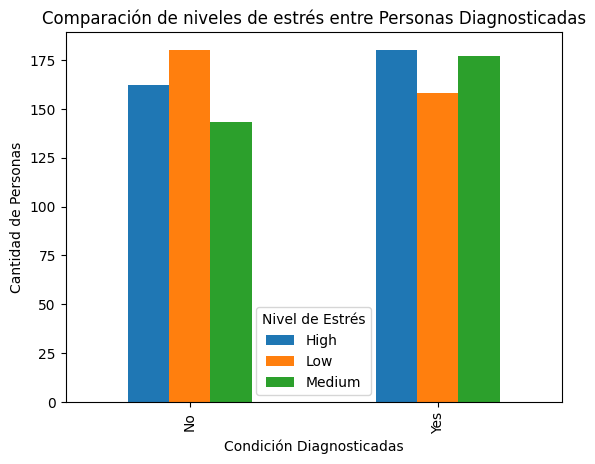

In [4]:
# Leemos el archivo CSV con los datos y lo carga en un DataFrame de Pandas
df = data_health

# Agrupamos los datos por 'Mental_Health_Condition' y 'Stress_Level',
# Contamos la cantidad de elementos en cada grupo
# Transforma los resultados de la agrupación en un DataFrame donde las columnas representan los diferentes niveles de estrés y las filas representan las condiciones mentales.
grouped_data = df.groupby(['Mental_Health_Condition', 'Stress_Level']).size().unstack()

# Mostramos los datos 
print(grouped_data)

# Crear el gráfico de barras agrupadas
grouped_data.plot(kind='bar')

# Personalizar el gráfico
plt.title('Comparación de niveles de estrés entre Personas Diagnosticadas')
plt.xlabel('Condición Diagnosticadas')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Nivel de Estrés')
texto_analisis = "La gráfica sugiere una clara relación entre el nivel de estrés y los problemas de salud mental. Las personas con altos niveles de estrés tienen una mayor probabilidad de ser diagnosticadas con problemas de salud mental, mientras que aquellas con bajos niveles de estrés están menos afectadas" 
# Mostrar el gráfico
plt.show()

## Analisis de ¿Cuál es el país con mas problemaa mentales? 


Mental_Health_Condition  No  Yes
Country                         
Australia                87   73
Canada                   59   79
Germany                  74   67
India                    70   85
Other                    62   53
UK                       67   72
USA                      66   86


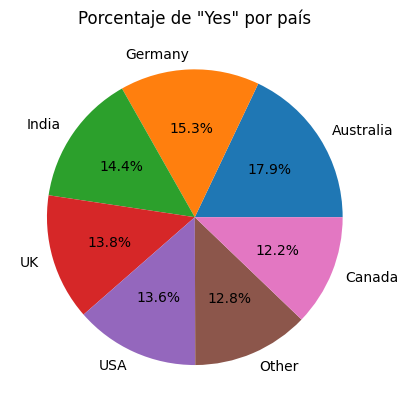

<Figure size 640x480 with 0 Axes>

In [5]:
# Agrupar y contar

df = data_health
df_counts = df.groupby(['Country', 'Mental_Health_Condition']).size().reset_index(name='cantidad')


# Suponiendo que tu DataFrame se llama 'df'

# Agrupamos los datos por país y contamos los diagnósticos 'Yes'
conteo_por_pais = df.groupby('Country')['Mental_Health_Condition'].value_counts().unstack(fill_value=0)
print(conteo_por_pais)



# Filtrar los datos donde diagnóstico es "Yes"
df_yes = df[df['Mental_Health_Condition'] == 'No']

# # Agrupar por país y contar los "Yes"
conteo_por_pais = df_yes['Country'].value_counts()

# Crear el gráfico de torta
plt.pie(conteo_por_pais, labels=conteo_por_pais.index, autopct='%1.1f%%')
plt.title('Porcentaje de "Yes" por país')
plt.show()
fig = plt.figure()

# # # Crear el gráfico
# fig = px.scatter(
#     df_counts.query("Mental_Health_Condition == 'Yes'"),
#     x='Country',
#     y='Mental_Health_Condition',
#     size='cantidad',
#     color='Mental_Health_Condition',
#     hover_name='Country',
#     title='Casos por País y Diagnóstico'
# )

# fig.show()

## Analisis de el nivel de gravedad y ver si hay más personas con problemas leves , medios  graves 


In [22]:


'''Se agrupan los datos por Si la persona reporto problemas mentales y por la severidad'''
severidad_de_problemas_mentales = data_health.groupby(['Mental_Health_Condition','Severity'],dropna=False).size().reset_index().rename(columns={0: "Count_Severity"})



'''Grafica de la severdad de los problemas mentales de las personas, con un query de si la persona reporto problemas mentales o no'''
grafica_severidad_de_problemas_mentales = px.pie(severidad_de_problemas_mentales.query(f"Mental_Health_Condition == '{'Yes'}'"),values="Count_Severity", names="Severity", hole=.2, title="Severidad de los problemas mentales de las personas")
texto_analisis = ""

grafica_severidad_de_problemas_mentales.show()



   

## Analisis cuantas personas han ido a terapia?

In [3]:
'''Se agrupan los datos si la persona reporto problemas mentales y si fue a terapia'''
terapia_personas = data_health.groupby(['Mental_Health_Condition','Consultation_History']).size().reset_index().rename(columns={0: "Count_Consultatuion_History"})

'''Grafica si las personas fueron a terapia dependiendo de su condicion mental'''
px.pie(terapia_personas.query(f"Mental_Health_Condition == '{'Yes'}'"),values="Count_Consultatuion_History", names="Consultation_History", hole=.2, title="Las personas que han ido a terapia")

## ¿El tiempo de sueño altera la salud mental ? 

C:\Users\torna\AppData\Local\Temp\ipykernel_5232\3908069567.py:28: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



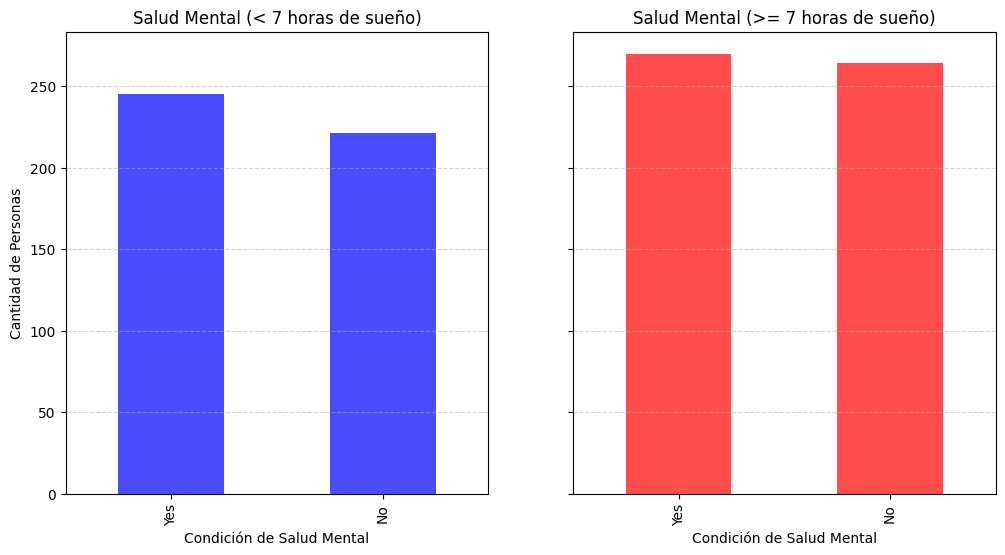

In [21]:
def Tiempo_Sueño(dataset):
        # Separar el dataset en dos grupos basados en las horas de sueño
    less_than_7 = dataset[dataset['Sleep_Hours'] < 7]  # Personas que duermen menos de 7 horas
    more_than_7 = dataset[dataset['Sleep_Hours'] >= 7]  # Personas que duermen 7 horas o más
    


    # Contar las frecuencias de las condiciones de salud mental (Mental_Health_Condition) para cada grupo
    mental_health_lt7 = less_than_7['Mental_Health_Condition'].value_counts()  # Menos de 7 horas
    mental_health_mt7 = more_than_7['Mental_Health_Condition'].value_counts()  # 7 o más horas

    # Crear gráficos para comparar las condiciones de salud mental entre los dos grupos
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # Dos gráficos lado a lado

    # Gráfico para el grupo con menos de 7 horas de sueño
    mental_health_lt7.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
    ax[0].set_title('Salud Mental (< 7 horas de sueño)')  # Título del gráfico
    ax[0].set_xlabel('Condición de Salud Mental')  # Etiqueta del eje X
    ax[0].set_ylabel('Cantidad de Personas')  # Etiqueta del eje Y
    ax[0].grid(axis='y', linestyle='--', alpha=0.5)  # Líneas de la cuadrícula para facilitar lectura

    # Gráfico para el grupo con 7 o más horas de sueño
    mental_health_mt7.plot(kind='bar', ax=ax[1], color='red', alpha=0.7)
    ax[1].set_title('Salud Mental (>= 7 horas de sueño)')  # Título del gráfico
    ax[1].set_xlabel('Condición de Salud Mental')  # Etiqueta del eje X
    ax[1].grid(axis='y', linestyle='--', alpha=0.5)  # Líneas de la cuadrícula para facilitar lectura

    fig.show()




Tiempo_Sueño(df)

## Analisis de top 10 profesiones con peor salud mental

Estas son las profesiones en el dataset:
Sales, Education, Other, Healthcare, IT, Engineering, Finance



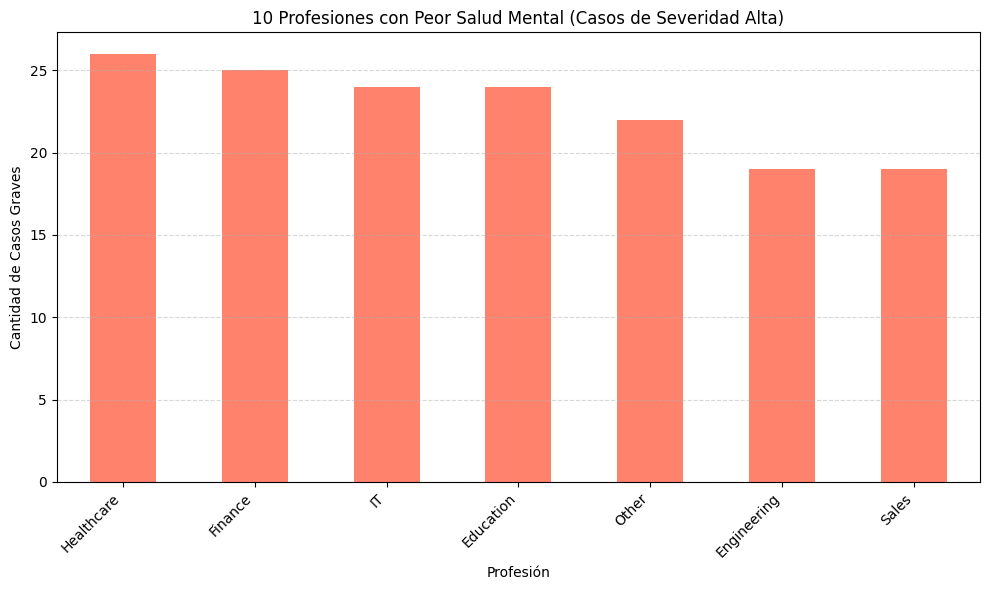

In [5]:
def analyze_professions(dataset):
    """
    Analiza las profesiones con peor salud mental basándose en la columna 'Severity'.
    Genera gráficos generales para las 10 profesiones con más casos de 'High' en 'Severity'.
    También imprime una lista de todas las profesiones en el dataset.

    :param dataset: DataFrame con las columnas necesarias, incluyendo 'Occupation' y 'Severity'.
    """
    # Listar todas las profesiones únicas en el dataset
    all_professions = dataset['Occupation'].unique()
    print(f"Estas son las profesiones en el dataset:\n{', '.join(all_professions)}\n")
    
    # Filtrar datos con 'Severity' == 'High'
    severe_cases = dataset[dataset['Severity'] == 'High']
    
    # Contar el número de casos graves por profesión
    severe_by_profession = severe_cases['Occupation'].value_counts()
    
    # Verificar si hay menos de 10 profesiones con casos graves
    num_professions = min(len(severe_by_profession), 10)


    # Filtrar las 10 peores profesiones (o menos si no hay suficientes)
    worst_professions = severe_by_profession.head(num_professions)
    
    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))
    worst_professions.plot(kind='bar', color='tomato', alpha=0.8)
    plt.title('10 Profesiones con Peor Salud Mental (Casos de Severidad Alta)')
    plt.xlabel('Profesión')
    plt.ylabel('Cantidad de Casos Graves')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
analyze_professions(df)


C:\Users\MarcosDiaz\AppData\Local\Temp\ipykernel_8064\703164731.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.figure.show()


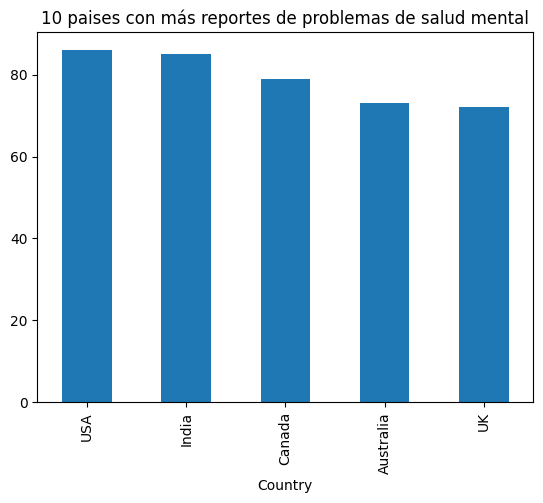

In [7]:
mascara = df['Mental_Health_Condition'] == 'Yes'

filtro = df[mascara]

count_paises_yes = filtro['Country'].value_counts()

fig = count_paises_yes.head(5).plot(kind='bar',x='Country', y='Cantidad de personas', title='10 paises con más reportes de problemas de salud mental')

fig.figure.show()

## Analisis niveles de estres por profesion 


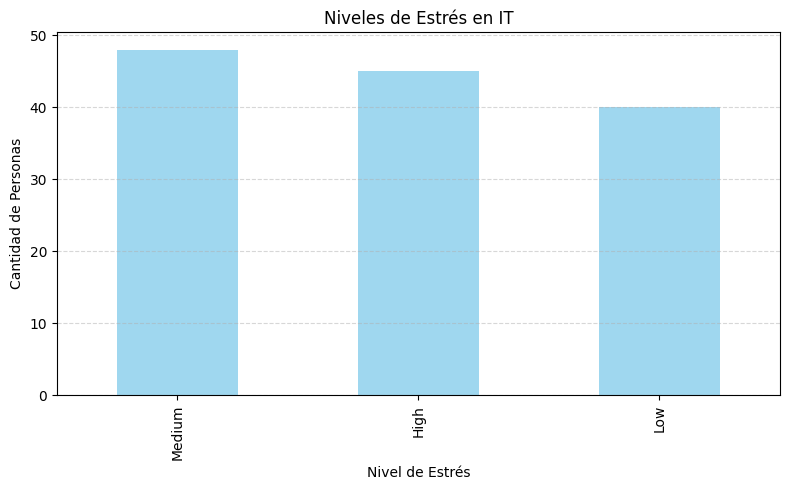

In [23]:
def analyze_specific_profession(dataset, profession):
    """
    Analiza una profesión específica y, en el mismo proceso, calcula estadísticas
    de todas las profesiones para relacionarlas con la salud mental, nivel de estrés 
    y horas de sueño.

    :param dataset: DataFrame con las columnas necesarias.
    :param profession: Nombre de la profesión a analizar.
    """
    # Calcular estadísticas generales para todas las profesiones
    profession_stats = dataset.groupby('Occupation').agg({
        'Severity': lambda x: (x == 'High').sum(),  # Conteo de casos 'High' en Severity
        'Stress_Level': lambda x: x.value_counts().to_dict(),  # Distribución de Stress_Level
        'Sleep_Hours': 'mean'  # Promedio de horas de sueño
    }).reset_index()

    # Ordenar por cantidad de casos graves ('High')
    profession_stats = profession_stats.rename(columns={'Severity': 'Severe_Count'})
    profession_stats = profession_stats.sort_values(by='Severe_Count', ascending=False)

    # Mostrar resumen general de estadísticas
    # print("Estadísticas generales por profesión:\n")
    # print(profession_stats)
    # print("\n")

    # Verificar si la profesión especificada está en el dataset
    if profession not in profession_stats['Occupation'].values:
        print(f"No se encontraron datos para la profesión: {profession}")
        return

    # Obtener los datos específicos de la profesión
    profession_data = profession_stats[profession_stats['Occupation'] == profession].iloc[0]

    # Extraer valores relevantes
    severe_count = profession_data['Severe_Count']
    avg_sleep = profession_data['Sleep_Hours']
    stress_distribution = profession_data['Stress_Level']

    # Imprimir estadísticas específicas de la profesión
    # print(f"Análisis para la profesión: {profession}\n")
    # print(f"Casos graves ('High') de salud mental: {severe_count}")
    # print(f"Promedio de horas de sueño: {avg_sleep:.2f}")
    # print(f"Distribución de niveles de estrés: {stress_distribution}")

    # Crear gráficos para la profesión específica
    # Gráfico de barras para la distribución de estrés
    plt.figure(figsize=(8, 5))
    pd.Series(stress_distribution).plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Niveles de Estrés en {profession}')
    plt.xlabel('Nivel de Estrés')
    plt.ylabel('Cantidad de Personas')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Generar y recorrer la lista de profesiones para analizarlas
profession = "IT"
analyze_specific_profession(df, profession)
print("\n")

